In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle


### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen  <a class="tocSkip"></a>

# Does and Don'ts  <a class="tocSkip"></a>
## Of Python Programming<a class="tocSkip"></a>
## Version 0.1 - September 2020

> Here we will take a look at some of the worst and best practices in Python programming. 

### Niels Bohr Institute  <a class="tocSkip"></a>

# Introduction 

The goal of this document is for the teachers at NBI to have a common standard for writing code so we expose the students to the best practices when coding in Python.  If we can do that at all levels of the education we ensure a uniformity between courses that helps the students progress more easily and we avoid having to "unlearn" bad practices and habits.  The end goal is to give the students the best possibilities for succeeding by adhering to some common practices. 

# Floating point constants 

Often we deal with very large or small numbers, for example Planck's constant 

\begin{align*} 
  h &= 6.62607015\times10^{-34}\,\mathrm{J}/\mathrm{s}\\
  \hbar &= 1.054571817\times10^{-34}\,\mathrm{J}/\mathrm{s}\quad.\\
\end{align*}

## First go (a don't)

In Python we can write such constants straight forwardly as 

In [2]:
h = 6.62607015 * 10**-34 
hbar = 1.054571817 * 10**-34
h,hbar 

(6.62607015e-34, 1.054571817e-34)

Note the notation used in the output: The _X_`e`_P_ means _X_ times 10 raised to the _P_ power. 

What we should realise here is that `h` and `hbar` are assigned the value of a computation.  That means that the values may suffer from rounding errors due to machine precision. 

## Second go (a do)

It is far better to write such constants  as true floating point constants.  We can use the notation as output above and define 

In [3]:
h = 6.62607015e-34 
hbar = 1.054571817e-34 
h,hbar 

(6.62607015e-34, 1.054571817e-34)

Given that `10**p` is a calculation that may not be exactly representable in a floating point number we may end up with rounding errors accumulating if we define constants as in the first case. 

## Third go (a do, perhaps better still) 

Many physical constants are defined in the sub-package `constants` of _SciPy_.  As far as possible one should use those. 

In [4]:
from scipy.constants import h, hbar, k, c 
h, hbar, k, c 

(6.62607015e-34, 1.0545718176461565e-34, 1.380649e-23, 299792458.0)

# Looping over data 

We often need to loop over data in one way or another.  However, for many different reasons the naïve way that many have seen or used is far from the best way.  Here, we will give some example of bad ways of looping over data and give better alternatives. 

## Sum data

Suppose we want to sum some data 

$$ s = \sum_{i=1}^{N} x_i\quad,$$ 

with the intent of calculating the mean, for example.   Let us generate some random data to work on. 

In [5]:
from numpy.random import default_rng
sample = default_rng().uniform(size=100)

### First go (a don't)

We could write our code in the style of C or Fortran and do 

In [6]:
s = 0 
for i in range(len(sample)):
    s += sample[i]
s 

46.4476584103697

Here, we obtain the length of the sample (`len(sample)`), then make a sequence of numbers from 0 up to that length with the use of `range`.  Then, we use that sequence, one by one, to access the corresponding observation in the sample (`sample[i]`), which we finally add to our sum (`s`).   This is truly terrible.   We really only need the observation (or value stored) - not the place where it is stored in the sample, so we can improve this. 

### Second go (a don't)

Instead of looping over the index where the observations are stored, we can simply loop (or _iterate_) over the observations directly. 

In [7]:
s = 0
for observation in sample:
    s += observation
s 

46.4476584103697

We have already simplified our code quite a bit _and_ at the same time made the intent of the code a lot more clear.  We pick out each observation in the sample and add that to our sum. 

### Side effects 

However, this is still not the best solution by far.  A `for` loop allows us to define _side effects_ - that is, change state of things that are not _direct_ input to our process.  Above, we have the side effect of incrementing the sum variable `s` by each observation.  We change the state of `s` in each iteration through the loop. 

Side effects are considered bad, because it makes it much harder to keep track of where state is changed.  In the above, it is not a big problem because the side effect is small and localised within simple code.  However, we can easily imagine much more complicated computations going on, possibly changing state (side effects) and thus making the flow data through our code obscure. 

### Third go (a do)

We are far better of using a _mapping_ to perform our sum.   By _mapping_ we think in the mathematical sense of a function that maps from one set to another 

$$f:X\rightarrow Y\quad.$$ 

In this, there is no possibility of side effects, and the flow of data is clear.  For our simple sum, we can use the built in function (mapping) `sum`.

$$\text{sum}: \{x_1,\ldots,x_n\}\mapsto\sum_i x_i\quad.$$

In [8]:
s = sum(sample)
s

46.4476584103697

Now our code is even simpler _and_ more expressive.   Our variable `s` is assigned the sum of observations in our sample. 

### Fourth go (a do - using _NumPy_)

Since we defined our random sample using _NumPy_, which means that `sample` is a `numpy.ndarray` object, we can directly use methods on that variable.  For example 

In [9]:
s = sample.sum()
s

46.447658410369684

## Calculating means

Above we calculate the sum of our sample.  To calculate the mean we could divide this sum by the number of observations to get the mean. 

### First go (a don't)

To get the number of observations in `sample` we can use the built-in function `len`.  We could then calculate the mean as 

In [10]:
m = s / len(sample)
m

0.46447658410369685

This is all well and good, but not very expressive.  Let us look at an alternative.

### Second go (a do)

We can use the _NumPy_ function `numpy.mean`, or we can use the `mean` member function of `numpy.ndarray`

In [11]:
from numpy import mean 
m = mean(sample)
m = sample.mean()
m

0.46447658410369685

Both are far more expressive than the first go - we clearly state that we are out to calculate the mean.  What is more, if `sample` consisted of $N$ observations where each observation consisted of $M$ coordinates (numbers) and we would like to calculate the mean of each coordinate, then we can do so by passing the argument `axis=` with an appropriate value.  For example for $N=100$, $M=3$

In [12]:
sample2d = default_rng().uniform(size=(100,3))
m2d = sample2d.mean(axis=0)
m2d

array([0.45341319, 0.505841  , 0.46761634])

## Variance 

Let us turn to the variance of the sample.   The estimator of the population variance ($\mathbb{V}[X]$) - or the sample variance - is defined as 

$$ v = \frac{1}{N}\sum_{i=1}^{N}(x_i-\overline{x})^2\quad,$$ 

or 

$$ v = \overline{x^2}-\overline{x}^2 = \frac{1}{N}\sum_{i=1}^{N}x_i^2 - \frac{1}{N^2}\left(\sum_{i=1}^N x_i\right)^2\quad.$$ 

### Unbiased estimator

If we want the _unbiased_ estimator we need to multiply by Bessel's correction 

\begin{align*} 
  v &\rightarrow \frac{N}{N-1}v\\ 
    &= \frac{N}{N-1}\frac{1}{N}\sum_{i=1}^{N}(x_i-\overline{x})^2 = \frac{1}{N-1}\sum_{i=1}^{N}(x_i-\overline{x})^2\\
    &= \frac{N}{N-1}\left[\frac{1}{N}\sum_{i=1}^{N}x_i^2 - \frac{1}{N^2}\left(\sum_{i=1}^N x_i\right)^2\right]\\
    &= \frac{1}{N-1}\sum_{i=1}^{N}x_i^2 - \frac{1}{N(N-1)}\left(\sum_{i=1}^N x_i\right)^2
\end{align*}

First, we will assume that our sample is in a _NumPy_ array.  If it isn't we can easily make it so by using for example `numpy.asarray` or one of the many other ways _NumPy_ allows us to generate arrays from data. 

### First go (a don't)

Starting from the first equation above, we could be tempted to write 

In [13]:
s = 0
for observation in sample: 
    s += observation

r = 0 
n = len(sample)
m = s / n
for observation in sample:
    r += (observation - m)**2 
v = 1 / n * r 
v

0.07875072405334775

Here we do _two_ iterations over data, which is never a good idea.  Loops are inherently slow in Python (or any other interpreted language), so here we double the amount of time spend iterating over data, not to mention the obvious problems of side-effects. 

### Second go (a don't)

Using the second expression for the sample variance, we could use a single iteration over data and calculate the two sums simultaneously 

In [14]:
s = 0
r = 0
n = len(sample)
for observation in sample:
    s += observation
    r += observation**2 
v = 1 / n * r - 1 / n**2 * s**2 
v

0.07875072405334763

Clearly, we have saved one iteration over the data - which is good - but we've introduced another (more subtle ) problem: Catastrophic cancellation.  

### Catastrophic cancellation 
In the above calculations we may end up with a very large value in `r` from which we subtract possibly another large value (`s**2`).  Due to the finite precision by which the computer can represent real numbers (`float`) we may very well end up with a cancellation of digits which means the result will be imprecise.  

To see this, consider a simple sample 

$$ \{4,7,13,16\}\quad.$$ 

The sample variance of this is 22.5. 

We will calculate the variances of this sample using the two methods above.  To do so, we define a function for each method. 

In [15]:
def var1(sample):
    from math import sqrt 
    s = 0
    for observation in sample: 
        s += observation

    n = len(sample)
    m = s / n
    r = 0 
    for observation in sample:
        r += (observation - m)**2 
    
    return 1 / n * r

def var2(sample):
    n = len(sample)
    s = 0
    r = 0
    for observation in sample:
        s += observation
        r += observation**2 
    
    return 1 / n * r - 1 / n**2 * s**2 

The function `var1` loops _twice_ over the data and calculates 
$$\sum_{i}(x_i - \bar{x})^2\quad.$$ 

The function `var2` loops only once and calculates 
$$\frac1N\sum_{i}x_i^2 - \left(\frac1N\sum_i x_i\right)^2\quad.$$

We use these two functions to calculate the variance 

In [16]:
from numpy import asarray
simple = asarray([4.,7.,13.,16.])
var1(simple),var2(simple)

(22.5, 22.5)

We get the expected result. Now let us add a large term to each observation - say $10^8$ - and recalculate the variance with each method.  We know that 

$$\mathbb{V}[X+a] = \mathbb{V}[X]\quad,$$ 

for random variable $X$ and constant $a$, so we expect the same results. 

In [17]:
simple += 1e8
var1(simple),var2(simple)

(22.5, 22.0)

We see that the second method gives us an incorrect result in this case.  Even though this second method is better in that we only iterate over the data once, it is worse in that it can give us incorrect results. 

### Third go (a don't)

Above we used explicitly loops, which of course is not good.  We could have used `sum` or the equivalent _NumPy_ functionality to do the calculations.  Let us see that for both methods.  First, the first expression.  Here, we will use the fact that `sample` is a _NumPy_ array so we can subtract a constant from it directly, and raise it to the second power too. 

In [18]:
m = sample.mean()
v = 1/len(sample)*sum((sample-m)**2)
v

0.07875072405334776

This is by far much more expressive than above, and we use _NumPy_ to do the iteration for us.  We still do two iterations (actually three - once for the mean, once for the difference to `m`, and then once again for the final sum) over data but they are done in much faster _NumPy_ code.  

### Fourth go (a don't)

Had our sample not been a _NumPy_ array, we could do the second calculation using a _list comprehension_

In [19]:
m = sample.mean()
v = 1/len(sample)*sum([(observation-m)**2 for observation in sample])
v

0.07875072405334776

A bit of clarity is lost but we skip one iteration over the data. 

For completeness we also consider the second formula for the sample variance.  Again, we use that `sample` is a _NumPy_ array so that we can raise it to the second power directly. 

In [20]:
m = sample.mean()
r = (sample**2).mean()
v = r - m**2 
v

0.07875072405334771

### Fifth go (a do)

We've seen that the best we can do is to use the first formula for the sample variance.  But we have also seen that the calculation requires at least 3 iterations over data.  To speed up this calculation, we will push the computations to _NumPy_ as early as possible.   

In [21]:
v = sample.var()
v 

0.07875072405334775

This has the additional benefit that we can easily ensure that we get the _unbiased_ estimator by passing the argument `ddof=1`

In [22]:
v = sample.var(ddof=1)
v 

0.07954618591247248

and that we can calculate variances for each coordinate separately 

In [23]:
v3d = sample2d.var(ddof=1,axis=0)
v3d 

array([0.080045  , 0.08489015, 0.08743938])

The point here is that we should use _NumPy_ (or _SciPy_ or other) functionality as far and early as possible.  That ensures that our code will run faster and we can be reasonably confident that the calculations are correct. 

## When you really need the index 

First of all one should really question ones solution if one needs to know the index.  Quite often one can find appropriate functionality in _NumPy_ that solves the problem at hand.   

Suppose, for example that we need to find the location (index) of the first value above a certain threshold $T$ in a time series $\{t_i\}$.  Let us do an example: 

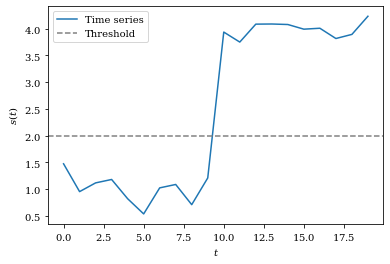

In [24]:
series      =  default_rng().normal(1,.2,size=20)
series[10:] += 3
threshold   = 2 

from matplotlib.pyplot import plot, axhline, xlabel, ylabel, legend
plot(series,label='Time series')
axhline(threshold,ls='--',color='gray',label='Threshold')
xlabel('$t$')
ylabel('$s(t)$')
legend();

To find the time of the first crossing, we can simply compare the time-series to our threshold (resulting in boolean values) and then find the first maximum 

In [25]:
from numpy import argmax 
cross = argmax(series > threshold)

Let us put that into the plot

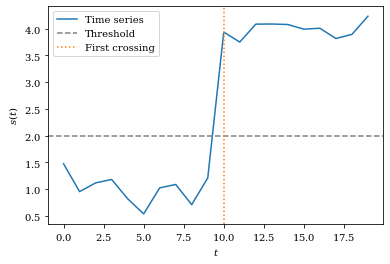

In [26]:
from matplotlib.pyplot import axvline 
plot(series,label='Time series')
axhline(threshold,ls='--',color='gray',label='Threshold');
axvline(cross,ls=':',color='C1',label='First crossing')
xlabel('$t$')
ylabel('$s(t)$')
legend();

If we want to find additional crossing, we can simply filter our data.  Suppose we have 

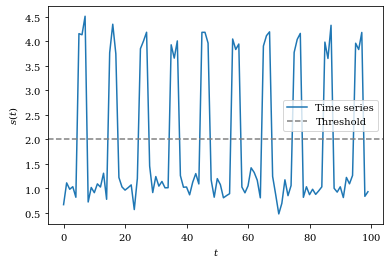

In [27]:
series        = default_rng().normal(1,.2,size=100)
series[5::10] += 3
series[6::10] += 3 
series[7::10] += 3 
plot(series,label='Time series')
axhline(threshold,color='gray',ls='--',label='Threshold')
xlabel('$t$')
ylabel('$s(t)$')
legend();

and we want to find all crossing of the threshold. 

We really do not need to iterate over the data.  Instead, we compare our data to the threshold to get a binary time series 

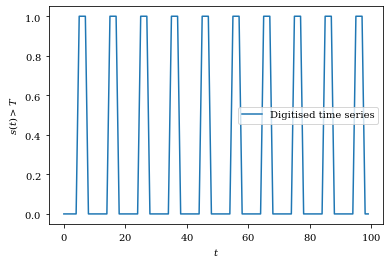

In [28]:
plot(series>threshold,label='Digitised time series')
xlabel('$t$')
ylabel('$s(t)>T$')
legend();

We have now reduced the problem to finding the first `1`s (or `True`) in each period.  We can then _differentiate_ this digitized time series and use the conditional `where` to find _up-edges_.   

In [29]:
from numpy import where, diff 
cross = where(diff((series>threshold).astype(int))>0)[0]+1

Again, let's plot this

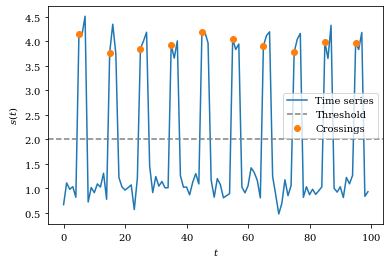

In [30]:
plot(series,label='Time series')
axhline(threshold,ls='--',color='gray',label='Threshold');
plot(cross,series[cross],'o',label='Crossings')
xlabel('$t$')
ylabel('$s(t)$')
legend();

With a bit of afterthought and some searching in the _NumPy_ and _SciPy_ documentation, one can often write much more efficient code than our initial inclination.  There is indeed very few cases where we do need an explicit iteration over data. 

This illustrates another point that we will come back to in the next section

> Considering all data as immutable and map it to other (or derived) data. 

That said, should the need arise, then we should make sure to iterate over elements - not the index - using the `enumerate` idiom

In [31]:
sample = default_rng().normal(size=5)
for i,observation in enumerate(sample): 
    print(f'{i}: {observation}')

0: 0.050666360394376296
1: 0.698683462502602
2: -0.4198777966872934
3: -0.1639211722392493
4: -1.4610099074708058


# Histogramming 

_NumPy_ provides the function `histogram` to form a count number of occurrences of a random variable within some predefined limits (or _bins_).  However, one must be careful when using this function.  

Let us generate a sample of random numbers distributed according to a standard normal distribution which we will use below.  We will also define our bins to split the interval $[-3,3]$ into 30 equally sized bins. 

In [32]:
from numpy import linspace
sample = default_rng().normal(size=1000)
bins   = linspace(-3,3,31)  # 30+1 since we need edges 

## Histogram as data 

First, we will consider what `numpy.histogram` does.  For each observation the function finds the corresponding bin index $i$ and then increments the count of that bin.  

What that means is what we get back from `numpy.histogram` is a _count_ in each bin $n_i$.  

$$\text{histogram}: \text{sample} \rightarrow \{(x_i,n_i)\}\quad,$$

where $x_i$ is the bin-centres.

If we where to plot that, then the ordinate will be number of events within each bin.  That means that the integral of the result is equal to the sample size _only_ if the bins are of unit size. 

### First go (a don't)

Let us use `numpy.histogram` on our sample above and plot the result as if it was a histogram

In [33]:
from numpy import histogram
h, b = histogram(sample,bins)
x, w = (b[1:]+b[:-1])/2, diff(b)

The function returns the count $n$ (`h`) and the used bin-edges $b$ (`b`).  To get the bin-centres and widths, we calculate 

\begin{align*}
  x_i &= \frac{b_{i+1}-b_i}2\\
  \Delta_i &= b_{i+1} - b_i
\end{align*}

above. 

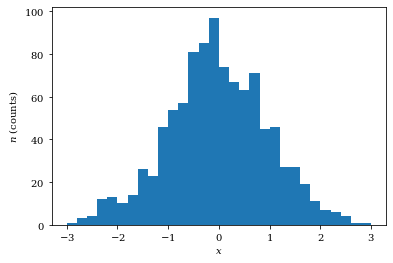

In [34]:
from matplotlib.pyplot import bar 
bar(x,h,w)
xlabel('$x$')
ylabel('$n$ (counts)');

### Integral 

The integral is given by 

$$ I = \sum_i n_i\Delta_i\quad,$$ 

where $\Delta_i$ is the width of each bin.  We find 

In [35]:
sum(h*w)

199.00000000000003

However, the number of observations within our limits $[-3,3]$ is 

In [36]:
from numpy import logical_and
len(sample[logical_and(sample>=bins[0],sample<=bins[-1])]),sum(h)

(995, 995)

### Second go (a do - almost)

The function `numpy.histogram` supports the option `density=True`, and if passed will return the _normalised distribution_ (or empirical probability density) 

$$\left.\frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}x}\right|_i=\frac1N\frac{n_i}{\Delta_i}\quad.$$ 

This is by far much more appropriate than what we got above.  The integral is given as above but will always evaluate to 1.  The _area_ is the empirical probability of the range given by the bin edges. 

Let us apply this to our sample 

Integral is 1.0


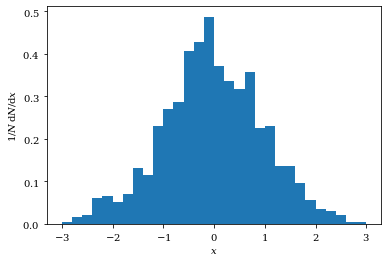

In [37]:
h, b = histogram(sample,bins,density=True)
x, w = (b[1:]+b[:-1])/2, diff(b)
bar(x,h,w)
xlabel('$x$')
ylabel(r'$1/N\,\mathrm{d}N/\mathrm{d}x$')
print(f'Integral is {sum(h*w)}')

### Third go (a do - almost)

Sometimes, we want the _un_-normalised _distribution_ 

$$\left.\frac{\mathrm{d}N}{\mathrm{d}x}\right|_i=\frac{n_i}{\Delta_i}\quad.$$ 

In that case, we should still can still use the option `density=True`, but multiply the end result by the number of observations within our range. 

Integral is 995.0


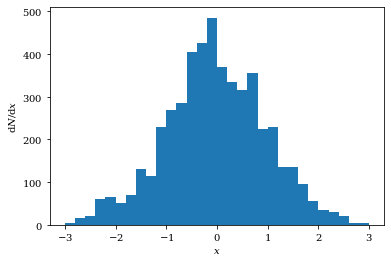

In [38]:
h, b =  histogram(sample,bins,density=True)
x, w =  (b[1:]+b[:-1])/2, diff(b)
h    *= len(sample[logical_and(sample>=bins[0],sample<=bins[-1])])
bar(x,h,w)
xlabel('$x$')
ylabel(r'$\mathrm{d}N/\mathrm{d}x$')
print(f'Integral is {sum(h*w)}')

The area of each bin is _proportional_ to the probability of the range corresponding to that bin. 

## Uncertainties 

Above, we said that the second and third goes where _almost_ _do's_.  What we are missing are the statistical uncertainties in each bin.   The statistical uncertainty on a count $n_i$ is (assuming $n_i$ not too small) given by the variance of a Poisson distribution with mean $n_i$ and is 

$$\delta_{n_i} = \sqrt{n_i}\quad.$$ 

For the normalised empirical probability density we find (standard error propagation)

$$\delta_{\left.\frac1N\frac{\mathrm{d}N}{\mathrm{d}x}\right|_i} 
= \frac{\sqrt{n_i}}{N\,\Delta_i}
= \sqrt{\frac{\left.\frac1N\frac{\mathrm{d}N}{\mathrm{d}x}\right|_i}{N \Delta_i}}
\quad,$$

while for an _un_-normalised distribution, we find that the uncertainty in each bin is 

$$\delta_{\left.\frac{\mathrm{d}N}{\mathrm{d}x}\right|_i} 
= \frac{\sqrt{n_i}}{\Delta_i}
= \sqrt{\frac{\left.\frac{\mathrm{d}N}{\mathrm{d}x}\right|_i}{\Delta_i}}
\quad.$$


### Fourth go (a do)

Let us plot the empirical probability density $1/N\mathrm{d}N/\mathrm{d}x$

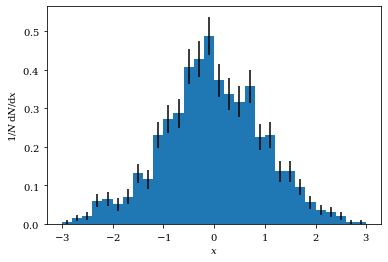

In [39]:
from numpy import sqrt 

h, b = histogram(sample,bins,density=True)
x, w = (b[1:]+b[:-1])/2, diff(b)
e    = sqrt(h/w/len(sample[logical_and(sample>=bins[0],sample<=bins[-1])]))
bar(x,h,w,yerr=e)
xlabel('$x$')
ylabel(r'$1/N\,\mathrm{d}N/\mathrm{d}x$');

### Fifth go (a do)

Let us plot the distribution $\mathrm{d}N/\mathrm{d}x$

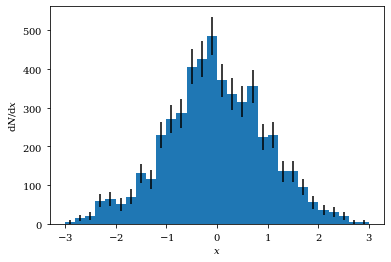

In [40]:
from numpy import sqrt 

h, b =  histogram(sample,bins,density=True)
x, w =  (b[1:]+b[:-1])/2, diff(b)
h    *= len(sample[logical_and(sample>=bins[0],sample<=bins[-1])])
e    =  sqrt(h/w)
bar(x,h,w,yerr=e)
xlabel('$x$')
ylabel(r'$\mathrm{d}N/\mathrm{d}x$');

###  `nbi_stat`

Using code as above we can treat histograms consistently and in a robust way, including non-equidistant bins.  

Alternatively one can use the module [`nbi_stat`](https://cholmcc.gitlab.io/nbi-python/statistics/#nbi_stat) (available on [ERDA](https://erda.dk) and via `pip install nbi_stat`) which has the drop in function `histogram` that also allows for weighted samples. 

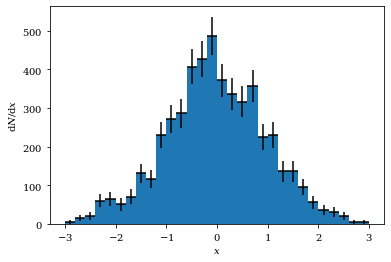

In [41]:
import sys 
sys.path.append('../statistics')

from nbi_stat import histogram, plot_hist
dNdx,x,w,edNdx = histogram(sample,bins)
plot_hist(dNdx,x,w,edNdx,as_bar=True)
xlabel('$x$')
ylabel(r'$\mathrm{d}N/\mathrm{d}x$');

## When a bar-chart _is_ appropriate

As outlined above, the function `numpy.histogram` counts number of occurrences within _bins_ and returns that count.   _Without_ the option `density` this is really only appropriate for a _finite and discrete_ random variable (or _categorical_ data).  However, for that purpose, the function `numpy.unique` is far more powerful and appropriate.  

Let us generate a sample of a discrete random variable and see how to handle that. 

In [42]:
sample = default_rng().choice(['Apples', 'Pears', 'Oranges'],size=30)

### First go (a don't) 

Here we will use `numpy.histogram` even though it is ill suited for this task.  We map our values `Apples`, `Pears`, and `Oranges` to numeric values by taking the length of the strings (6, 5, 7, respectively). 

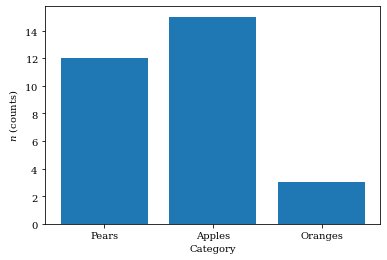

In [43]:
from numpy import histogram 

h, b = histogram([len(s) for s in sample],3)
x, w = (b[1:]+b[:-1])/2, diff(b)

from matplotlib.pyplot import xticks
bar(x,h,.8 * w)
xticks(x,['Pears','Apples','Oranges'])
xlabel('Category')
ylabel('$n$ (counts)');

As per convention we leave room between the rectangles as this is a true bar-chart (not histogram).

### Second go (a do)

We are actually far better off using `numpy.unique` in this case.  Let us show how

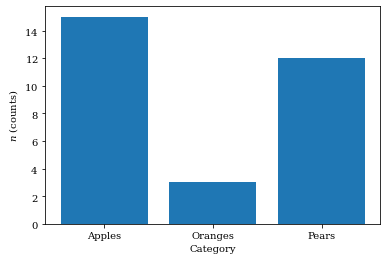

In [44]:
from numpy import unique

categories, counts = unique(sample,return_counts=True)
bar(categories,counts)
xlabel('Category')
ylabel('$n$ (counts)');

Without additional effort we directly plot the data and the various functions does exactly what we expect. 

## Summary 

The function `numpy.histogram` must only ever by used with the option `density=True`, to get $1/N\,\mathrm{d}N\!/\mathrm{d}x$.  One should calculate the statistical uncertainties as 

$$\delta_i = \sqrt{\frac{\left.1/N\,\mathrm{d}N\!/\mathrm{d}x\right|_i}{N\Delta_i}}\quad,$$ 

where $N$ is the number of observations in the given range and $\Delta_i$ is the $i^{\mathrm{th}}$ bin width. 

The function `matplotlib.pyplot.hist` must _never_ be used.  It does not include uncertainties in the visualisation. 

As an alternative to `numpy.histogram` and `matplotlib.pyplot.bar` (or `matplotlib.pyplot.errorbar`) consider the functions `nbi_stat.histogram` and `nbi_stat.plot_hist`.  The module is available on [ERDA](https://erda.dk) or through a regular `pip` installation 

    pip install nbi_stat 
    
Full documentation including many examples as well as a book with much more in statistics are [available](https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik). 

  

# Fitting 

Let us consider measurements of the invariant mass in a particle physics experiment 

In [45]:
invmass = asarray([0.00, 0.05, 0.10, 0.15, 0.20, 0.25,   
                   0.30, 0.35, 0.40, 0.45, 0.50, 0.55,  
                   0.60, 0.65, 0.70, 0.75, 0.80, 0.85,  
                   0.90, 0.95, 1.00, 1.05, 1.10, 1.15, 
                   1.20, 1.25, 1.30, 1.35, 1.40, 1.45,  
                   1.50, 1.55, 1.60, 1.65, 1.70, 1.75,
                   1.80, 1.85, 1.90, 1.95, 2.00, 2.05,  
                   2.10, 2.15, 2.20, 2.25, 2.30, 2.35,
                   2.40, 2.45, 2.50, 2.55, 2.60, 2.65, 
                   2.70, 2.75, 2.80, 2.85, 2.90, 2.95])
counts = asarray([    7,    2,    6,   12,   15,   18, 
                     31,   29,   27,   27,   41,   35, 
                     37,   37,   63,   71,  102,   95, 
                    115,  202,  190,  113,   86,   68,
                     74,   79,   75,   79,   68,   62,
                     69,   81,   79,   85,   87,   68,
                     70,   89,   77,   70,   71,   62, 
                     85,   62,   73,   70,   59,   61,  
                     77,   61,   62,   73,   67,   71, 
                     75,   66,   73,   71,   71,   49])

Data from Bevington

The data is given as raw counts of events.  To turn this into a proper distribution we need to divide by the bin width ($\Delta_i = 0.05$ for all $i$), and we calculate the uncertainty appropriately.  

In [46]:
from numpy import ones_like
w     = 0.05 * ones_like(counts)
dNdM  = counts / w
edNdM = sqrt(counts) / w 

Note, we _do not_ change our original data, but instead map it to new data. 

Let us draw the data with error bars 

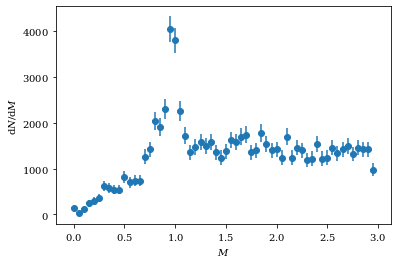

In [47]:
from matplotlib.pyplot import errorbar

errorbar(invmass,dNdM,edNdM,w/2,label='Spectrum',fmt='o')
xlabel('$M$')
ylabel(r'$\mathrm{d}N/\mathrm{d}M$');

We will model our data with a polynomial background and a Lorentz (or Cauchy) peak 

\begin{align*}
  f_b(M;a,b,c) &= a + b M + c M^2\\
  f_p(M;M_0,\Gamma) &= \frac{1}{2\pi}\frac{\Gamma}{(M-M_0)^2+(\Gamma/2)^2}\quad,
\end{align*}

where $a,b,c$ models the background and $M_0,\Gamma$ is the centre and width of the peak, respectively.  We will allow for different relative strength of the two contributions so that our final model is 

$$f(M;a,b,c,A,M_0,\Gamma) = f_b(M;a,b,c)+Af_p(M;M_0,\Gamma)\quad.$$

Let us define the model functions

In [48]:
def fb(M,a,b,c):
    return a + b * M + c * M**2

def fp(M,M0,Gamma):    
    from numpy import pi 
    return 1/(2 * pi) * Gamma / ((M - M0)**2 + (Gamma/2)**2)

def f(M,a,b,c,A,M0,Gamma):
    return fb(M,a,b,c) + A * fp(M, M0, Gamma)

We will fit our model function $f$ to the data.  Here we use `nbi_stat.fit` which provides a uniform interface for fitting models to data (linear and non-linear least-squares, standard and extended log-likelihood of binned or unbinned data).  We will also use `nbi_stat.plot_fit` to make a nice plot without little effort on our part. 

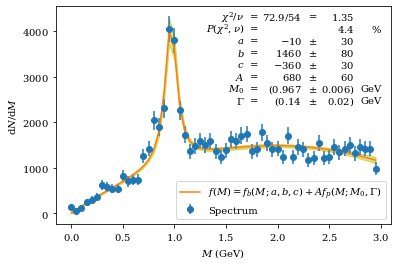

In [49]:
from nbi_stat import fit, plot_fit

p, cov = fit(f,invmass,dNdM,(0,0,0,100,1,.1),edNdM)
plot_fit(invmass,dNdM,edNdM,f,p,cov,
         parameters=['a','b','c','A',
                     {'label':'M_0','unit':'GeV'},
                     {'label':'\Gamma','unit':'GeV'}],
         data={'fmt':'o','label':'Spectrum'},
         fit='$f(M)=f_b(M;a,b,c)+Af_p(M;M_0,\Gamma)$',
         legend={'loc':'lower right'})
xlabel('$M$ (GeV)')
ylabel(r'$\mathrm{d}N/\mathrm{d}M$');

Note how the plot contains a propagation of fit uncertainties to the function as a band.  Also note that parameter uncertainties are rounded to one significant digit and the values are given with the same precision. 

## "Known" distributions 

Suppose we had data that we wanted to fit with some well-known distribution - say a normal distribution.  In that case, we should avoid writing our own function as much as possible.  The point of this is that most functions in for example _SciPy_ are written in such a way that they allow fast parallel evaluation over many input "points" (sometimes called _vectorized_ although a bit of a misnomer). 

Let us generate a sample of a standard normal distributed random variable and generate a histogram of this sample.  For the sake of generality we will do so using a function.  Since we will fit _probability density functions_ (PDFs) to our data, we need to normalise the histogram. 

In [50]:
from scipy.stats import norm

def gen_sample(dist=norm,*params,bins=linspace(-3,3,31),size=1000):
    from nbi_stat import histogram 
    
    sample         = dist(*params).rvs(size=size)
    dNdx,x,w,edNdx = histogram(sample,bins,normalize=True)
    return dNdx,x,w,edNdx

dNdx,x,w,edNdx = gen_sample()

### First go (a don't)

Here, we will define our own normal distribution and pass that to our fitting routine.

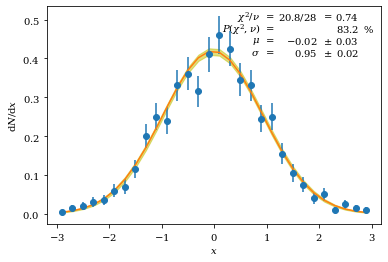

In [51]:
def normal(x,mu,sigma):
    from numpy import pi, exp
    return 1/(sqrt(2*pi)*sigma) * exp(-((x-mu)/sigma)**2/2)

p, cov = fit(normal,x,dNdx,(0,1),edNdx)
plot_fit(x,dNdx,edNdx,normal,p,cov,
         parameters=[r'\mu',r'\sigma'],
         data={'fmt':'o'})
xlabel('$x$')
ylabel(r'$\mathrm{d}N/\mathrm{d}x$');

Here, it worked, but had we defined `normal` in terms of `math.exp` (instead of `numpy.exp`) then it would have failed or taken much longer to finish.

### Second go (a do)

We might as well take at advantage of the implementation in _SciPy_. 

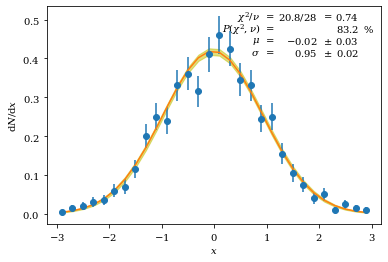

In [52]:
p, cov = fit(norm.pdf,x,dNdx,(0,1),edNdx)
plot_fit(x,dNdx,edNdx,norm.pdf,p,cov,
         parameters=[r'\mu',r'\sigma'],
         data={'fmt':'o'})
xlabel('$x$')
ylabel(r'$\mathrm{d}N/\mathrm{d}x$');

### A generic example 

Using our function `gen_sample` above, we can create an example function which takes an arbitrary distribution (well, as defined in _SciPy_), generates a sample and then fits the PDF to that sample

In [53]:
def gen_and_fit(dist=norm,*params,bins=linspace(-3,3,31),size=1000,title=''):
    from matplotlib.pyplot import title as tit
    
    dNdx, x, w, edNdx = gen_sample(dist, *params, bins=bins, size=size)
    p, cov = fit(dist.pdf, x, dNdx, params, edNdx)
    plot_fit(x, dNdx, edNdx, dist.pdf, p, cov, data={'fmt':'o'})
    xlabel('$x$')
    ylabel(r'$\mathrm{d}N/\mathrm{d}x$')
    tit(title+f' {size} samples with parameters {params}')

Let us try this on a couple of distributions 

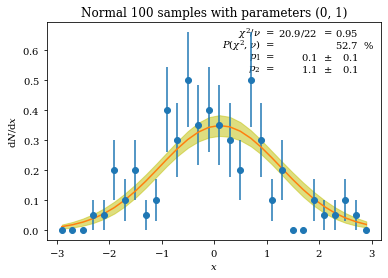

In [54]:
gen_and_fit(norm,0,1,size=100,title='Normal')

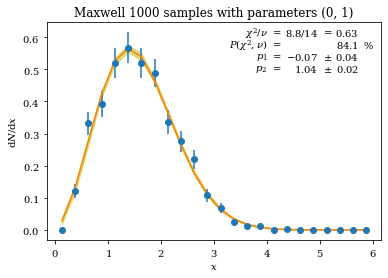

In [55]:
from scipy.stats import maxwell
gen_and_fit(maxwell,0,1,bins=linspace(0,6,25),title='Maxwell')

# Consider data _immutable_

Generally, we should consider all input data immutable.  That is, input data should not be changed at all.   This practice has consequences on all levels of our programs - from the outer most to the inner most code.  

Overall, this approach leads us to write code which is much more structured and where we define _mappings_ of data.  By _mappings_ we mean functions in a mathematical sense 

$$f: X \rightarrow Y\quad.$$ 

The function $f$ maps the domain $X$ in the co-domain $Y$.  In code, we sometimes call such mappings for _pure functions_, but we prefer _mapping_.  A consequence of this, is that mappings cannot have _side effects_.  That is, a mapping cannot change state (assign values) to its inputs or anything external to that function. The only "assignment" visible from outside the function is the returned - or mapped - value. 

## Point charges 

Let us consider an example.  We want to determine the effective electric field $\vec{E}$ originating from a number of point charges.  Each point charge has a position $\vec{x}_i$ and a charge $q_i\in\{-1,+1\}$.  The electric field at position $\vec{y}$ from a single charge $q$ at $\vec{x}$ is given by 

$$\vec{E} = k_c \frac{q}{r^2}\hat{r}\qquad\hat{r}=\frac{\vec{r}}{r}\qquad r=\|\vec{r}\|\qquad\vec{r}=\vec{y}-\vec{x}\quad,$$ 
 
where $k_c\approx 8.988\times10^{9}\,\mathrm{N}\mathrm{m}^2/\mathrm{C}^2$ is Coulomb's constant which we will set to unity ($k_c=1$).   The effective electric field at position $\vec{y}$ from $N$ charges is then 

$$\vec{E}=\sum_{i=1}^{N}\vec{E}_i=k_c\sum_{i=1}^{N}\frac{q_i}{r_i^2}{\hat{r}_i}
  \qquad \hat{r}_i=\frac{\vec{r}_i}{r_i}\qquad r_i=\|\vec{r}_i\|\qquad\vec{r}_i=\vec{y}-\vec{x}_i\quad.$$

### First go (a don't)

Let us start by generating 10 point charges randomly distributed over a unit square with random charge sign. 

In [56]:
rng = default_rng(123)
x = rng.uniform(size=(10,2))
q = rng.choice((-1,1),size=10)

Let us draw these point charges

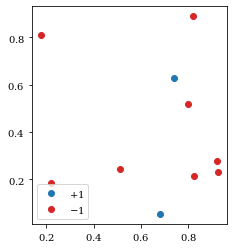

In [57]:
from matplotlib.pyplot import gca
plot(*x[q>0].T,'o',color='C0',label='$+1$')
plot(*x[q<0].T,'o',color='C3',label='$-1$')
legend()
gca().set_aspect(1)

We want to calculate the effective electric field $\vec{E}$ over the unit square. That means that for some resolution we need to calculate the distance from all points in that square to all charges.   We will impose a resolution of $\delta$ on our square, and we can get coordinates using `numpy.meshgrid`. 

In [58]:
from numpy import meshgrid
delta  = 0.05
grid_x, grid_y = meshgrid(linspace(0,1,int(1/delta)),
                          linspace(0,1,int(1/delta)))

Next, we need to need to sum up the contributions form each charge.  We define the variables `Ex` and `Ey` to hold our effective electric field and iterate over all charges using a `zip`.  For each charge we calculate the vector to all points in our grid. 

In [59]:
from numpy import zeros_like
Ex = zeros_like(grid_x)
Ey = zeros_like(grid_y)
for (charge_x,charge_y),charge_q in zip(x,q):
    rx,ry  =  grid_x-charge_x, grid_y-charge_y
    r      =  sqrt(rx**2+ry**2)
    qoverr =  charge_q / r**2 
    ex,ey  =  qoverr * rx / r, qoverr * ry / r 
    Ex     += ex 
    Ey     += ey 

This all looks pretty kosher at first glance, but it really isn't.  First off, if we consider the loop as a separate process, we have an explicit side effect in that we assign to `Ex` and `Ey`.  Secondly, when we calculate the distances and contributions we do not really treat our input data as immutable.  We will see below how we can make this more robust.  

For now, we can plot the charges and the resulting electric field 

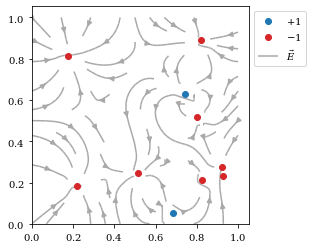

In [60]:
from matplotlib.pyplot import streamplot

plot(*x[q>0].T,'o',color='C0',label='$+1$')
plot(*x[q<0].T,'o',color='C3',label='$-1$')
col = streamplot(grid_x,grid_y,Ex,Ey,color='darkgray',density=.5)
col.lines.set_label(r'$\vec{E}$')
legend(loc='upper left',bbox_to_anchor=(1,1))
gca().set_aspect(1)

### Second go (a do)

Here we will attack the problem slightly differently.  First of all, we will consider the generation of random positions of our $N$ charges as a mapping 

$$\text{make charges}: \mathbb{N}\rightarrow \mathbb{R}^2\times Q\qquad Q=\{-1,+1\}\quad,$$ 

that is, we map the number of charges into some positions and charges.  We define this mapping as a function in Python 

In [61]:
def make_charges(size=10,seed=123):
    from numpy.random import default_rng
    
    rng = default_rng(seed)
    x = rng.uniform(size=(2,size))
    q = rng.choice((-1,1),size=size)
    
    return x,q 

Secondly, we will make a mapping from grid-spacing to our grid.  

In [62]:
def make_grid(delta=0.05):
    from numpy import meshgrid,linspace, array
    
    n = int(1/delta)
    return array(meshgrid(linspace(0,1,n),linspace(0,1,n)))

Note that we return the grid as a _tensor_ where the first index chooses between $x$ and $y$

With these two mappings (functions) in place we are ready to attack the problem of calculating the effective electric field.   However, we will first consider how to calculate the direction vector from all charges to all grid points.  Again, we define a mapping 

$$\text{calc directions}: \mathbb{R}^2,\mathbb{R}^2 \rightarrow \mathbb{R}^2\quad.$$

In [63]:
def calc_directions(positions,grid):
    from numpy import newaxis
    grid_expanded = grid[...,newaxis]  # Room for positions
    pos_expanded  = x[...,newaxis,newaxis,:].T # Room for grid
    return grid_expanded-pos_expanded

Note how we expand our grid tensor and position matrix to allow for calculating all distances. 

Next, we need to determine $r_i$ and $\hat{r}$ for all grid points and all charges.  We define a single function that will give us back both 

In [64]:
def calc_rhat(directions):
    from numpy import sqrt
    
    r    = sqrt(directions[0]**2+directions[1]**2)
    rhat = directions / r 
    return r, rhat 

Calculating the individual contributions from the charges at each grid point now becomes trivial 

In [65]:
def calc_contributions(r,rhat,charge):
    qoverr = charge / r**2 
    e      = qoverr * rhat 
    return e 

To get the final effective field, we simply need to sum all contributions (last coordinate)

In [66]:
def calc_field(contributions):
    return contributions.sum(axis=-1)

Phew, that was a lot.  However, we have broken our problem into smaller pieces that are easily understood and which we may test and debug independently of each other. 

Before we put it all together we make a final function to visualise the result 

In [67]:
def visualize(grid,field,positions,charges):
    from matplotlib.pyplot import gca

    ax = gca()
    
    ax.plot(*positions[:,charges>0],'o',color='C0',label='$+1$')
    ax.plot(*positions[:,charges<0],'o',color='C3',label='$-1$')

    col = ax.streamplot(*grid,*field,color='darkgray',density=.5)
    col.lines.set_label(r'$\vec{E}$')

    ax.legend(loc='upper left',bbox_to_anchor=(1,1))
    ax.set_aspect(1)

We put everything together 

In [68]:
def full(size=10,delta=0.05):
    positions, charges = make_charges(size)
    grid               = make_grid(delta)
    directions         = calc_directions(positions,grid)
    r, rhat            = calc_rhat(directions)
    contributions      = calc_contributions(r,rhat,charges)
    field              = calc_field(contributions)
    visualize(grid,field,positions,charges)

Our prescription for calculating the effective electric field becomes very clear - each step is identified by a mapping, and by combining these mappings we arrive at the result. 

Note, we could make the convolution of the mappings even more explicit by 

In [69]:
def convolute(size=10,delta=0.05):
    positions, charges = make_charges(size)
    grid               = make_grid(delta)
    field              = calc_field(
        calc_contributions(
            *calc_rhat(
                calc_directions(positions,grid)),
            charges))
    visualize(grid,field,positions,charges)

We run the final function 

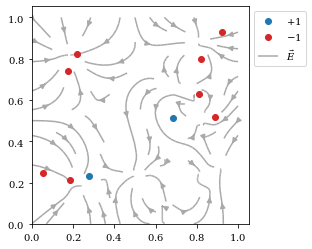

In [70]:
full()

Or, with the second explicit convolution method

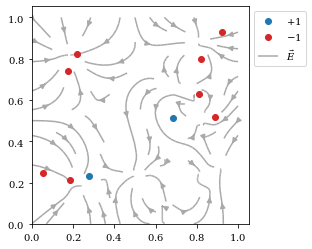

In [71]:
convolute()

# Data formats

## Variety of formats 

Python's standard library (which comes with _all_ installations) supports a lot of file formats.  A non-exhaustive list include 

- `csv` Comma separated values.  The data is represented by rows and columns. Each line is a separate row and columns are delimited by some character - for example `,`, `;`, or spaces.  The files are human-read- and writeable.
- `json` Javascript object notation.  Each object is represented as a hierarchy of key-value pairs.  Keys are always strings while values can be numbers (`int` or `float`), strings, or lists, or further objects.  This format maps naturally to Python's `dict` type.  The files are human-read- and writeable.  
- `pickle`.  Python's native binary representation of data.  Whole object hierarchies can be serialized to and deserialized from this format.  The files are not human readable. 
- `zip,tar,...` (Compressed) archives.  Archive of individual files (possibly in a folder structure).  Archives can be read and written directly.  Formats are typically not human-readable. 

Other file formats are supported by external packages 

- `yaml` YAML ain't markup language (package `pyyaml`).  A derivative of `json`.  The notation is slightly more simple.
- `numpy`.  _NumPy_ has a binary format for storing single arrays in a file.  Multiple arrays can be packaged together in a zip archive.  This format is highly efficient for _NumPy_ data. The files are not human readable. 
- `xslx,osd,...` Various spreadsheet formats (package `pandas`).  The popular spreadsheet package `pandas` provides many filters for reading and writing popular spreadsheet data. 
- `hd5` Hierarchical data format (package `h5py`).  HDF5 is a binary hierarchical format popular in Astro-Physics.

There is a good chance that an existing format will suit whatever needs one may have. 

## Plain ol' data

Suppose we have some data we want to store in a file.  The data could be unsorted counts, or could be correlated pairs of for example time and observation, or similar.  The simplest way to store such data is as lines in a text file. 

### First go (a don't)

The naïve way of creating such a text file is to generate it ourselves using the Python text file I/O mechanisms

In [72]:
out_data = default_rng().poisson(size=20)
with open('data.dat','w') as file:
    file.writelines([f'{i}\t{count}\n' for i,count in enumerate(out_data)])

To read back the data we would do 

In [73]:
with open('data.dat','r') as file:
    lines = file.readlines()
    in_data  = [int(line.split()[1]) for line in lines]
    
assert all(in_data == out_data)

Notice how we define the format ourselves as well as the parsing of that format.  Given that Python supports so many formats (possibly via external packages), this makes little sense.  

### Second go (a do)

Instead of defining our own format and parser, we can use for example `numpy.savetxt` and `numpy.loadtxt`

In [74]:
from numpy import savetxt, loadtxt

savetxt('data2.dat',out_data)
in_data = loadtxt('data2.dat')

assert all(in_data == out_data)

We are no longer sensitive to small mistakes in decoding and the like.  Also, `numpy.savetxt` and `numpy.loadtxt` are robust and allows for headers and such, plus proper error handling. 

## Structured data 

Suppose our data is more structured.  For example, we may have a hierarchy of particles.  Each particle may have some "descendants" (e.g., through interactions or decays) 

    mother -+- daughter 1 -+- grand daughter 1 
            |              `- grand daughter 2    
            +- daughter 2 -+- grand daughter 3 
            +- daughter 3 
            |
            ...
            
In addition, each particle may be characterised by a kind (a PDG code), point of origin, and momentum, the latter to Lorentz four-vectors. 

Such a hierarchy could be represented in Python as an object hierarchy of `Particle` objects 

In [75]:
class Particle:
    def __init__(self,name,origin,momentum):
        self._name      = name 
        self._origin    = asarray(origin)
        self._momentum  = asarray(momentum)
        self._daughters = [] 
        
    def add_daughter(self,daughter):
        self._daughters.append(daughter)
        
    def decay(self,t,names):
        from numpy import array 
        
        n = len(names)
        o = self._origin[:3]+t*self._momentum[:3]
        o = array((*o,t))
        self._daughters = [Particle(name,o,self._momentum) for name in names]  # A-physical!
        
    def __str__(self):
        s = self._name
        if len(self._daughters) > 0:
            s += ' → (' + ','.join([str(d) for d in self._daughters]) + ')'
        return s 

Note, the above is _not_ physically correct.  However, the code will help us illustrate a few things. 

Let us generate a hierarchy of particles using this class 

In [76]:
mother = Particle('Λ0',[0,0,0,0], [0,0,1,1])  # Lambda 0
mother.decay(1,['p','π-'])
mother._daughters[1].decay(10,['μ-','ν_μ_bar'])

print(mother)

Λ0 → (p,π- → (μ-,ν_μ_bar))


### First go (a don't)

The naïve way of writing such a hierarchy to disk would be to write a separate line for each particle with an appropriate identifier as the first entry in the line.  Possible daughter identifiers are appended to the end of the line. Here we will (mis-)use the Python function `id` to give unique identifiers for each particle. 

In [77]:
def particle2line(particle):
    s = f'{id(particle)}'+'\t'+f'{particle._name}'+'\t' + \
        f'{" ".join([str(o) for o in particle._origin])}'+'\t' \
        f'{" ".join([str(p) for p in particle._momentum])}'+'\t' \
        f'{" ".join([str(id(d)) for d in particle._daughters])}'+'\n' + \
        ''.join([particle2line(d) for d in particle._daughters])
    return s 

Using this function, we can write the particles to a file

In [78]:
with open('particles.dat','w') as file:
    file.write(particle2line(mother))

The content of the file will be something like 

In [79]:
print(particle2line(mother))

139785441297168	Λ0	0 0 0 0	0 0 1 1	139785441296880 139785441300048
139785441296880	p	0 0 1 1	0 0 1 1	
139785441300048	π-	0 0 1 1	0 0 1 1	139785441299856 139785441299712
139785441299856	μ-	0 0 11 10	0 0 1 1	
139785441299712	ν_μ_bar	0 0 11 10	0 0 1 1	



To read back the data, we need to do a bit of book-keeping, which definitely will complicate matters a lot.  We define a function that will read a single particle.  We cannot be sure that the daughter particles have already been read, so we need to keep track of those and only after reading all particles can we assign daughters to their mothers.   To keep track of daughters we use a dictionary. 

In [80]:
def line2particle(line):
    parts    = line.split()
    pid      = int(parts[0])
    particle = Particle(parts[1],
                        [float(o) for o in parts[2:6]],
                        [float(p) for p in parts[6:10]])
    return pid,(particle,[int(did) for did in parts[10:]])

Note that this function returns a key (`pid`) and value (the particle object and list of daughter IDs).  We can use `dict` comprehension to update our main look-up table.  Let us read in the particles 

In [81]:
with open('particles.dat','r') as file:
    db = dict(line2particle(line) for line in file.readlines())

But this is not the whole story.  We need to tie the daughters to mothers to get our hierarchy back.  

Since we do not know in which order we get the particles in, we need to loop through out dictionary, find any potential daughters and attach them to their mother.   Also, we have no idea which particles are ultimate mothers, so we must keep track of those that do not have mothers to return the top of the hierarchy.  We define a function to do that for us

In [82]:
def restore_hierarchy(db):
    not_mothers = []
    for pid,(p,daughters) in db.items():
        p._daughters = [db[did][0] for did in daughters]
        not_mothers += [daughters]
               
    return [p for pid,(p,_) in db.items() if pid not in not_mothers]

Let us restore the hierarchy 

In [83]:
mothers = restore_hierarchy(db) 
print(mothers[0])

Λ0 → (p,π- → (μ-,ν_μ_bar))


As we can see, we need to jump through a lot of hoops to properly read back our code.  What is more, our code is riddled with side effects and we have very little in terms of error handling. 

### Second go (a do)

Rather than inventing a new format, let use use the JSON format for storing our data.  To that end, we want to be able to convert our particles to and from simple dictionaries.  We make two relatively simple functions 

In [84]:
def particle2dict(particle):
    return {'name': particle._name,
            'origin': particle._origin.tolist(),
            'momentum': particle._momentum.tolist(),
            'daughters': [particle2dict(d) for d in particle._daughters]}
        
def dict2particle(kv):
    p = Particle(kv['name'],kv['origin'],kv['momentum'])
    p._daughters = [dict2particle(d) for d in kv['daughters']]
    return p 

The encoding is pretty straight forward.  One thing to bare in mind, is that we need to convert the _NumPy_ arrays (`_origin` and `_momentum`) to plain Python lists as JSON does not know how to handle a _NumPy_ array (although it is trivial to make it aware of any type). 

Let us convert our entire hierarchy to a dictionary and print it using the pretty-print function `pprint.pprint`. 

In [85]:
from pprint import pprint 

pprint(particle2dict(mother))

{'daughters': [{'daughters': [],
                'momentum': [0, 0, 1, 1],
                'name': 'p',
                'origin': [0, 0, 1, 1]},
               {'daughters': [{'daughters': [],
                               'momentum': [0, 0, 1, 1],
                               'name': 'μ-',
                               'origin': [0, 0, 11, 10]},
                              {'daughters': [],
                               'momentum': [0, 0, 1, 1],
                               'name': 'ν_μ_bar',
                               'origin': [0, 0, 11, 10]}],
                'momentum': [0, 0, 1, 1],
                'name': 'π-',
                'origin': [0, 0, 1, 1]}],
 'momentum': [0, 0, 1, 1],
 'name': 'Λ0',
 'origin': [0, 0, 0, 0]}


We can now write this out using JSON

In [86]:
from json import dump

with open('particles.json','w') as file:
    dump(particle2dict(mother),file)

The file will look a little like the pretty-print we did above. 

Let us read back the particles 

In [87]:
from json import load 

with open('particles.json','r') as file:
    obj = dict2particle(load(file))
    print(obj)

Λ0 → (p,π- → (μ-,ν_μ_bar))


With considerably less effort than before, we have managed to write and read our object hierarchy, and our code does not have side effects. In addition we get the error handling of the JSON library.

## Data with meta data

Sometimes we may have tabular data like the counts we did above, but we would also like to attach meta data to that data.  Since functions like `loadtxt` cannot handle that, we can not directly encode the meta into such a format. 

The naïve approach is to once again define a custom format and write encoders and decoders for that.  Here, we will not give an example of such a strategy, since the code tends to become long and obfuscated.  Instead we will illustrate a far better strategy:  Using a container format. 

The point is that we will choose the best format for our data and meta data.  For example, for an array of counts we could choose CSV while for the meta data we choose JSON.   We then put these into a container file format - say ZIP. 

### First go (a do)

We generate some data from a counting experiment 

In [88]:
counts = 3*default_rng().poisson(size=30)+10

and some meta data as a dictionary 

In [89]:
meta = {'pedestal': 10, 'gain': 3}

We then open our ZIP file and add two files to it 

In [90]:
from zipfile import ZipFile
from csv import writer
from json import dumps 
from io import StringIO
from numpy import reshape

with ZipFile('data.zip','w') as zipfile:
    zipfile.writestr('meta.json',dumps(meta))
    
    strdata = StringIO()
    writer(strdata).writerows(reshape(counts,(len(counts),1)))
    zipfile.writestr('data.csv',strdata.getvalue())

Let us open the ZIP file and read back the data and meta data 

In [91]:
from json import load 

with ZipFile('data.zip','r') as zipfile:
    zipfile.printdir()
    meta    = load(zipfile.open('meta.json','r'))
    data    = loadtxt(zipfile.open('data.csv','r'))

File Name                                             Modified             Size
meta.json                                      2021-11-16 11:32:08           27
data.csv                                       2021-11-16 11:32:08          120


We can quickly and easily accomplish our goal using this strategy and at the same time use the most suitable format or our data. 

# More information 

Many resources for use of Python in teaching are available from the [NBI-Python](https://cholmcc.gitlab.io/nbi-python) pages.  Many of the resources are available in both Danish and English. 

- The note [_Best practises in Python_](https://cholmcc.gitlab.io/nbi-python/basics/#BedsteVaner) gives more  information about best practices - in particular with regards to structured programming. 

- The note [_Basic data visualization and analysis_](https://cholmcc.gitlab.io/nbi-python/basics/#BasalData) contains examples of basic data analysis and visualisation 

- There are many other notes with more general information as well as more specialised 

  - [_Python overview_](https://cholmcc.gitlab.io/nbi-python/basics/#Python) gives a brief overview of the Python syntax 
  - [_Plain and NumPy indexing_](https://cholmcc.gitlab.io/nbi-python/basics/#Indexing) explains how to use indexing in Python - a truly powerful tool. 
  - The book [_Statistics overview with Python_](https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik) is on statistics illustrated using Python.  The topics ranges from samples to advanced fitting using extended maximum likelihood as well as many other topics. 
  - The short note [_Symbolic algebra in Python_](https://cholmcc.gitlab.io/nbi-python/mathematics/#Symbolic) gives a short introduction to _SymPy_ - the package that turns your Python environment into a powerful Computer Algebra System with tight integration to _NumPy_ for numerical computations. 

  
Finally, the module `nbi_stat` (available and documented on the above [page](https://cholmcc.gitlab.io/nbi-python/statistics/#nbi_stat)) contains a lot of functionality for easing many tasks done in the course of statistical data analysis.   Install in your Python environment with 

    pip install nbi_stat 